# KNN  
Premier exemple      Bank

0) Importer les librairies classiques : numpy, pandas, seaborn et matplolib

In [2]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

1) Lire le fichier Bank.csv avec pandas

In [3]:
#ouverture du fichier csv avec séparation des données par le ; 
df=pd.read_csv('Bank.csv', sep=',',header=0, index_col=0)
df

,age du client,montant du prêt,défaut
0,25,40000,0
1,35,60000,0
2,45,80000,0
3,20,20000,0
4,35,120000,0
5,52,18000,0
6,23,95000,1
7,40,62000,1
8,60,100000,1
9,48,220000,1


2) Créer les 2 dataframes suivants:
- X contenant les colonnes 'age du client','montant du prêt' 
- et y contenant la colonne "défaut"

In [19]:
#On retire la colone défaut à df pour X
X=df.drop(['défaut'],axis=1)
#On retire les colonnes age et pret à df pour Y 
Y=df.drop(['age du client', 'montant du prêt'],axis=1)


0     0
1     0
2     0
3     0
4     0
5     0
6     1
7     1
8     1
9     1
10    1
Name: défaut, dtype: int64


2bis) Afficher les prêts des "bons" clients

In [22]:
#liste pour les montants des prêts des bons clients
prets_bons_clients=[]
for i in range(len(Y)):
    #test si client n'a pas de défauts
    if Y['défaut'][i]==0:
        prets_bons_clients.append(X['montant du prêt'][i])
print(prets_bons_clients)

[40000, 60000, 80000, 20000, 120000, 18000]


3) Tracer le nuage de points "montant du prêt" en fonction de "age du client", les points étant de couleurs différentes suivant leur catégorie respective dans la colonne "défaut"

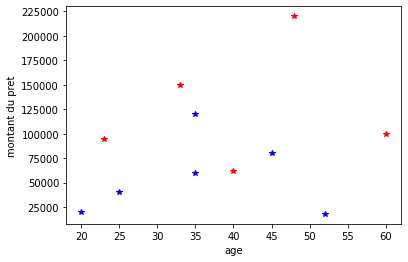

In [23]:
for i in range(len(X)):
    #test si le prêt du client est dans la liste des prêts des bons client
    if X['montant du prêt'][i] in prets_bons_clients:
        #Afficher en bleu si bon client
        plt.plot(X['age du client'][i],X['montant du prêt'][i],'b*')
    else:
        #Afficher en rouge si mauvais client
        plt.plot(X['age du client'][i],X['montant du prêt'][i],'r*')

plt.ylabel('montant du pret')
plt.xlabel('age')
plt.show()


3bis) Placer le client ([[25,30000]]) dans la figure précédente

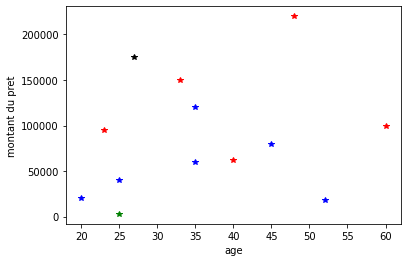

In [31]:
for i in range(len(X1[1])):
    if X['montant du prêt'][i] in prets_bons_clients:
        plt.plot(X['age du client'][i],X['montant du prêt'][i],'b*')
    else:
        plt.plot(X['age du client'][i],X['montant du prêt'][i],'r*')

#Ajout d'un point vert pourle client demandé
plt.plot([25],[3000],'g*')

#Ajout d'un point noir pour un client qui nous servira pour le test du modèle
plt.plot([27],[175000],'k*')

plt.ylabel('montant du pret')
plt.xlabel('age')
plt.show()


4) Entrainement et test avec l'algorithme KNN. Est ce le résutat dépend de la valeur de K? Vérifier

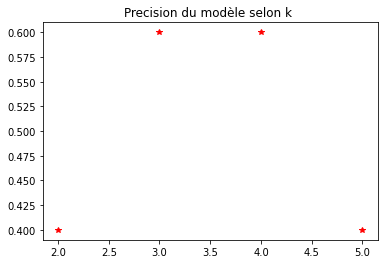

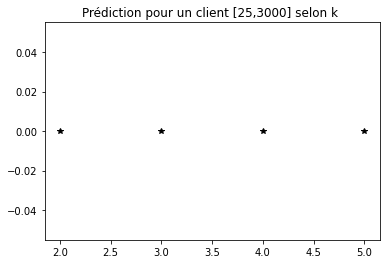

/Users/titouan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/titouan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/titouan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/titouan/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d ar

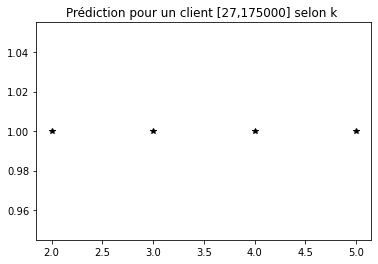

In [45]:
from sklearn.model_selection import train_test_split
#Séparation des données en 4 listes avec des données test de 40%
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.4)

from sklearn.neighbors import  KNeighborsClassifier

#liste pour rentrer la précision du modèle pour chaque k
precision_k=[]

#liste pour rentrer la précision du modèle pour chaque k
ls_prediction=[]

#On fait varier le k
for k in range(2,6):
    knn = KNeighborsClassifier(n_neighbors = k )
    #entrainement du modèle knn
    knn.fit(X_train,Y_train.values.ravel())
    precision_k.append((knn.score(X_test,Y_test)))
    prediction=knn.predict([[25,3000]])
    ls_prediction.append(prediction)

plt.plot([2,3,4,5],precision_k,'r*')
plt.title('Precision du modèle selon k ')
plt.show()
#On observe bien une variation de la precision selon k

plt.plot([2,3,4,5],ls_prediction,'k*')
plt.title('Prédiction pour un client [25,3000] selon k ')
plt.show()
#la prediction reste la même

#On réalise la même chose en changeant la valeur du point estimé pou run supposé mauvais client

#liste pour avoir le résultat de la prédiction du modèle 
ls_prediction1=[]

for k in range(2,6):
    knn = KNeighborsClassifier(n_neighbors = k )
    #entrainement du modèle knn
    knn.fit(X_train,Y_train)
    prediction=knn.predict([[27,175000]])
    ls_prediction1.append(prediction)

plt.plot([2,3,4,5],ls_prediction1,'k*')
plt.title('Prédiction pour un client [27,175000] selon k ')
plt.show()
#On a bien une prédiction de 1 qui est stable